# Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import PIL 
import matplotlib.pyplot as plt
import cv2
from facenet_pytorch import MTCNN, InceptionResnetV1
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets,transforms

# How does MTCNN works.

In [2]:
mtcnn=MTCNN(image_size=240,
            margin=0,
            keep_all=True,
            min_face_size=40)

In [3]:
def preprocess_img_gray(img_path):
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    return img

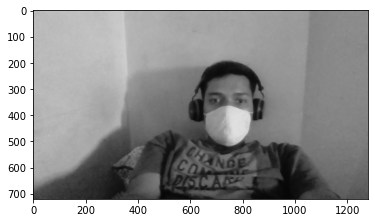

In [4]:
#testing preprocess_img
img=preprocess_img_gray('C:/Users/ashis/OneDrive/Pictures/Camera Roll/WIN_20210531_15_19_08_Pro.jpg')
plt.figure()
plt.imshow(img)

In [5]:
#this return faces and the prob.
faces,probs=mtcnn(img,return_prob=True)
#this return the bounding boxes and probab.
face_boxes,_=mtcnn.detect(img)
face_boxes=np.int32(face_boxes)

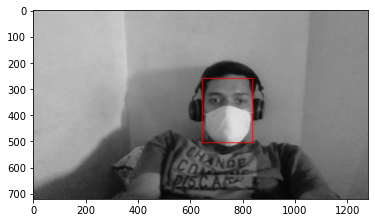

In [6]:
for box in face_boxes:
    (x,y,w,h)=box
    cv2.rectangle(img, (x, y), (w,h), (255,0,0), 2)
plt.imshow(img)

# Getting InceptionResnetV1

In [7]:
#after this we will use InceptionResnetV1 to get the encoding of face 
model=InceptionResnetV1(pretrained='vggface2')
model.eval()

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

# Face Recognition

In [8]:
def ToTensor(img):
    img=torch.Tensor(img)
    img=img.unsqueeze(0)
    img=img.permute(0,3,1,2)
    return img

In [9]:
def get_enc(path):
    img=cv2.imread(path)
    gray=preprocess_img_gray(path)
    faces,probs=mtcnn(gray,return_prob=True)
    face_boxes,_=mtcnn.detect(gray)
    enc=model(faces)
    return enc[0].detach().numpy()

In [10]:
#creating path database 
path_db={}
i='D:/Deep Learning Projects/Face Recognition/'
path_db["Amitabh Bachan"]=i+"images/amitabh1.jfif"
path_db["Pankaj Tripathi"]=i+"images/pnkj1.jfif"
path_db["Shahrukh Khan"]=i+"images/srk1.jpg"
path_db["Akshay Kumar"]=i+"images/aki1.jfif"
path_db["Nawazudin Sidique"]=i+"images/nawaj1.jfif"
path_db["Raj Kumar Rao"]=i+"images/rkr1.jfif"

In [11]:
#creating database of encoding
enc_db={}
for i in path_db.keys():
    enc=get_enc(path_db[i])
    enc_db[i]=enc

In [12]:
#recognition
def recognition(path,db):
    enc=get_enc(path)
    m=100
    encs=[]
    for(name,db) in db.items():
        dist=np.linalg.norm(db-enc)
        encs.append(dist)
        if dist<m:
            m=dist
            identity=name
    plt.imshow(cv2.imread(path))
    print("It's {}.".format(identity))

It's Amitabh Bachan.


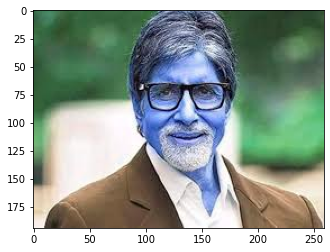

In [13]:
#reconising an image
recognition('D:/Deep Learning Projects/Face Recognition/images/amitabh2.jfif',enc_db)